In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [108]:
import os
# define data path
STAT_P_126 = "data/stat_p_126.csv"
STAT_P_126_META = "data/STAT_P_126_Metadata.csv"

In [109]:
import pandas as pd

# Load data
data = pd.read_csv(STATS_P_126)
metadata = pd.read_csv(STAT_P_126_META)

# Display the first few rows of each dataframe
metadata.head()

,資料集名稱,資料集描述,資料集代碼,資料集所屬單位,資料集類別,環境保護計畫類別,主要資料欄位,資料來源,授權方式,授權說明網址,編碼格式,更新頻率,最後更新時間,聯絡人姓名,聯絡人電話,聯絡人電子郵件,標籤
0,全國一般廢棄物產生量,本資料彙整行政院環保署提供之公告應回收量及地方環保機關提報之一般廢棄物清理狀況，統計各類一般...,STAT_P_126,環保署統計室,地,資源循環,item1(統計期)、value1(總產生量)、value2(一般垃圾量)、value3(資...,環保統計查詢網,依政府資料開放平臺使用規範,https://data.gov.tw/license,UTF-8,1月,2023-07-13 07:14:21,顏先生,02-23117722#2109,shihjie.yan@epa.gov.tw,一般廢棄物產生量、垃圾產生量、垃圾


In [110]:
data.head()

,item1,value1,value2,value3,value4,value5
0,112年 2月,...,...,...,...,...
1,112年 1月,...,...,...,...,...
2,111年 12月,942920,400175,503093,39651,1.308
3,111年 11月,923937,375509,507648,40781,1.326
4,111年 10月,928293,385122,501734,41437,1.29


In [111]:

# Define a function to check if '月' is present in the date
def has_month(chinese_date):
    return '月' in chinese_date

# Apply the function to the 'item1' column to create a boolean mask
mask = data['item1'].apply(has_month)

# Use the mask to split the data into two DataFrames
data_with_month = data[mask]
data_without_month = data[~mask]

# Print the first few rows of each DataFrame
print("Data with month:")
print(data_with_month.head())
print("\nData without month:")
print(data_without_month.head())


Data with month:
      item1     value1     value2     value3     value4   value5
0   112年 2月        ...        ...        ...        ...      ...
1   112年 1月        ...        ...        ...        ...      ...
2  111年 12月     942920     400175     503093      39651    1.308
3  111年 11月     923937     375509     507648      40781    1.326
4  111年 10月     928293     385122     501734      41437     1.29

Data without month:
   item1    value1   value2   value3  value4 value5
14  111年  11238654  4799426  5950352  488876   1.32
27  110年  10049062  3895153  5666869  487041  1.173
40  109年   9869675  4062029  5278079  529567  1.144
53  108年   9812418  4290856  5023517  498045  1.139
66  107年   9740671  4317339  4828340  594992  1.132


In [115]:
import re

def convert_date_regex(chinese_date):
    # Extract the year and month from the Chinese date using regex
    match = re.match(r'(\d+)年\s*(\d*)月*', chinese_date)
    
    if match:
        # The year is offset by 1911 because the original data is in the Republic of China calendar
        year = int(match.group(1)) + 1911
        month = match.group(2)
        # Convert the year and month to a datetime object
        return pd.to_datetime(f"{year}-{int(month)}")
    else:
        print(f"Problematic input: {chinese_date}")
        return None

# Apply the function to the 'item1' column
data = data_with_month
data['date'] = data['item1'].apply(convert_date)

# Drop the original 'item1' column
data = data.drop(columns=['item1'])

# Display the first few rows of the updated dataframe
data

,value1,value2,value3,value4,value5,date
0,...,...,...,...,...,2023-02-01
1,...,...,...,...,...,2023-01-01
2,942920,400175,503093,39651,1.308,2022-12-01
3,923937,375509,507648,40781,1.326,2022-11-01
4,928293,385122,501734,41437,1.29,2022-10-01
...,...,...,...,...,...,...
152,645598,305836,269215,70548,0.899,2011-05-01
153,621122,289336,264815,66971,0.894,2011-04-01
154,630674,302931,261922,65822,0.878,2011-03-01
155,579427,296920,218724,63782,0.893,2011-02-01


In [116]:
# Calculate summary statistics for compost data (value4)
summary_stats = data['value4'].describe()

# Print summary statistics
summary_stats

count           146
unique          144
top             ...
freq              2
Name: value4, dtype: object

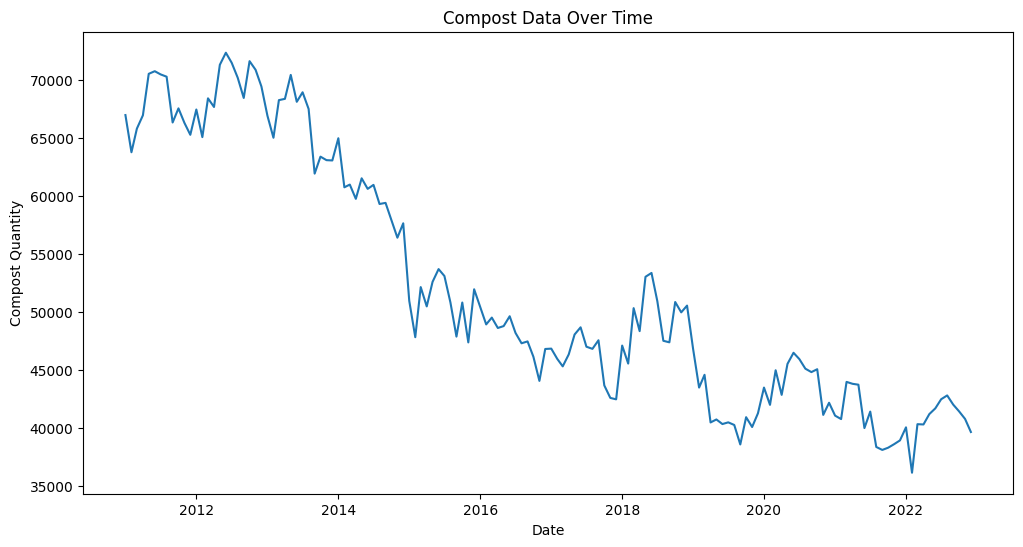

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'value4' column to numeric, coercing errors to NaN
data['value4'] = pd.to_numeric(data['value4'], errors='coerce')

# Create a line plot of compost data (value4) over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='value4')

plt.title('Compost Data Over Time')
plt.xlabel('Date')
plt.ylabel('Compost Quantity')
plt.show()

In [120]:
data = data.sort_values(by='date')
data = data.groupby('date').mean()


TypeError: Could not convert       ... to numeric

In [86]:
# Resample the data to fill any missing months (this makes the time series continuous)
data_monthly = data['value4'].resample('MS').asfreq()

# Interpolate missing values
data_monthly = data_monthly.interpolate()
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='value4')
plt.title('Compost Data Over Time')
plt.xlabel('Date')
plt.ylabel('Compost Quantity')
plt.show()


ValueError: cannot reindex on an axis with duplicate labels